## Information
In the given dataset, R&D Spend, Administration Cost and Marketing Spend of 50 Companies
are given along with the profit earned. The target is to prepare an ML model which can predict
the profit value of a company if the value of its R&D Spend, Administration Cost and Marketing
Spend are given.
1) Construct Different Regression algorithms
2) Divide the data into train set and test set
3) Calculate different regression metrics
4) Choose the best model

## Importing Data

In [28]:
import pandas as pd
import numpy as np
import random
data = pd.read_csv("50_Startups.csv")
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [29]:
# checking for missing values
var = data.isna().sum()
if var.any() != 0:
    print("There are missing values")
    print(data.isna().sum())
else:
    print("There are no missing values")


There are no missing values


### Since there are no missing values, imputation is not required.

## Exploratory Data Analysis (EDA)

In [30]:
#EDA is not possible because we do not have categorical data.
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# 1) Constructing different Regression Algorithms

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
model_dict_reg = {"RandomForestRegressor": RandomForestRegressor(),
                  "Ridge": Ridge(),
                  "DecisionTreeRegressor": DecisionTreeRegressor(),
                  "SVR": SVR()
                 }

In [32]:
# checking for the data types of each columns
type_testing_list = []
for key,value in enumerate(data):
    x = type(data[value][6])
    type_testing_list.append(x)
type_testing_list

[numpy.float64, numpy.float64, numpy.float64, numpy.float64]

In [33]:
dummyX = data.drop("Profit", axis=1)
X = dummyX.astype(int)
y = pd.DataFrame(data['Profit'].astype(int))
np.random.seed(42)
# from sklearn.preprocessing import OneHotEncoder as OHE
# from sklearn.compose import ColumnTransformer as CT
# data_to_convert = ['R&D Spend', 'Administration', 'Marketing Spend']
# one_hot = OHE()
# transformer = CT([("one_hot",
#                    one_hot,
#                    data_to_convert)],
#                  remainder = "passthrough")
# transformed_x = transformer.fit_transform(X)
# data_to_convert_y = ['Profit']
# one_hot = OHE()
# transformer = CT([("one_hot",
#                    one_hot,
#                    data_to_convert_y)],
#                  remainder = "passthrough")
# transformed_y = transformer.fit_transform(y)
# transformed_y
# print(type(transformed_y))


# 2) Dividing the data into train and training sets

In [34]:
from sklearn.model_selection import train_test_split as tts
# X_train, X_test, y_train, y_test = tts(transformed_x,transformed_y,test_size = 0.2)
X_train, X_test, y_train, y_test = tts(X,y,test_size = 0.2)

# 3) Training and calculation of different Evaluation metrics

In [35]:
# Just feed the training and test sets in the function below and we can get the score of each regression alogrithm

RandomForestRegressor score = 0.9038605148122991
Ridge score = 0.9000609453047692
DecisionTreeRegressor score = 0.8525555090916613
SVR score = -0.17990473575185884
The highest score is of 0.9038605148122991
This Result is on a single test set without using corss validation


C:\Users\Neeraj Mathur\desktop\MLDL projects\env\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\Neeraj Mathur\desktop\MLDL projects\env\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


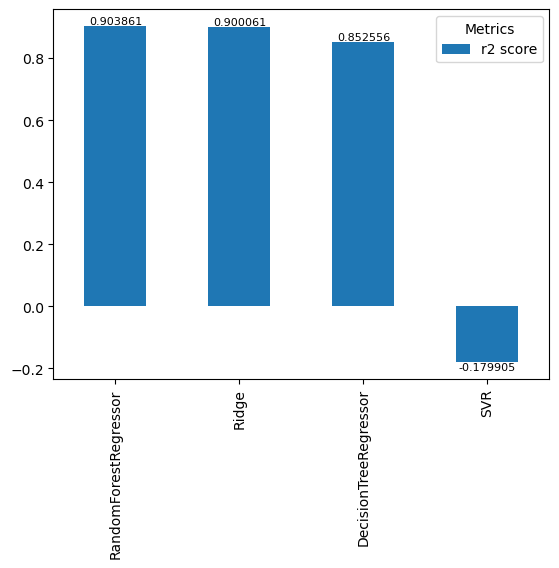

In [36]:
r2_dict = {}
def fit_and_Score(X_train_split, y_train_split, X_val_split, y_val_split):
    model_scores_list = []
    for key,regressor in model_dict_reg.items():
        model_fit = regressor.fit(X_train_split,y_train_split)
#         y_preds = model_fit.predict(xtest_features)
        model_scores = model_fit.score(X_val_split, y_val_split)
        model_scores_list.append(model_scores)
        print(f'{key} score = {model_scores}')
        maxed = max(model_scores_list)
        r2_dict[key] = model_scores
    return print(f'The highest score is of {maxed}')
np.random.seed(42)
function_call = fit_and_Score(
                              X_train_split = X_train,
                              y_train_split = y_train,
                              X_val_split = X_test,
                              y_val_split = y_test)
####################### Plotting
# for lim in range(len(model_dict_reg)):
#     print(function_call.__next__())
# plotting our results
# use the below commented code in case if there is error in plotting graphs
model_compare_r2 = pd.DataFrame(r2_dict,index = ["r2 score"])
# model_compare_pre = pd.DataFrame(precision_dict,index = ["precision"])       
# model_compare_rec = pd.DataFrame(recall_dict,index = ["recall_Score"])
print("This Result is on a single test set without using corss validation")
##### Use the below code to print al the metrics ourside of the function
# print(f'{model_compare_acc}\n {model_compare_pre}\n {model_compare_rec}')

r2_plot = model_compare_r2.T.plot.bar()
for container in r2_plot.containers:
    r2_plot.bar_label(container, label_type='edge', fontsize=8, color='black')
r2_plot.legend(title='Metrics') 
# pre_plot = model_compare_pre.T.plot.bar()
# recall_plot = model_compare_rec.T.plot.bar()

RandomForestRegressor:r2 = -4.171331132858853
RandomForestRegressor:neg_mean_absolute_error = -20989.9902
RandomForestRegressor:neg_mean_squared_error = -742860766.4161639
Ridge:r2 = -0.12161992884554138
Ridge:neg_mean_absolute_error = -7040.723062061297
Ridge:neg_mean_squared_error = -94908167.61826864
DecisionTreeRegressor:r2 = -5.468360948696382
DecisionTreeRegressor:neg_mean_absolute_error = -21753.96
DecisionTreeRegressor:neg_mean_squared_error = -794709512.1800001
SVR:r2 = -12.320377219701308
SVR:neg_mean_absolute_error = -39530.29890879552
SVR:neg_mean_squared_error = -2290921664.617995


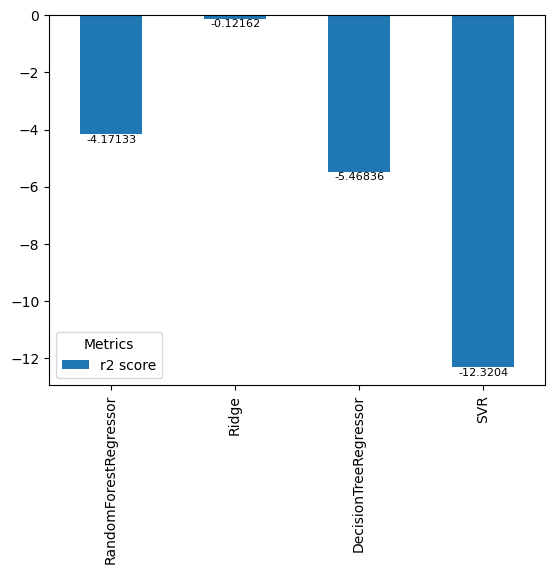

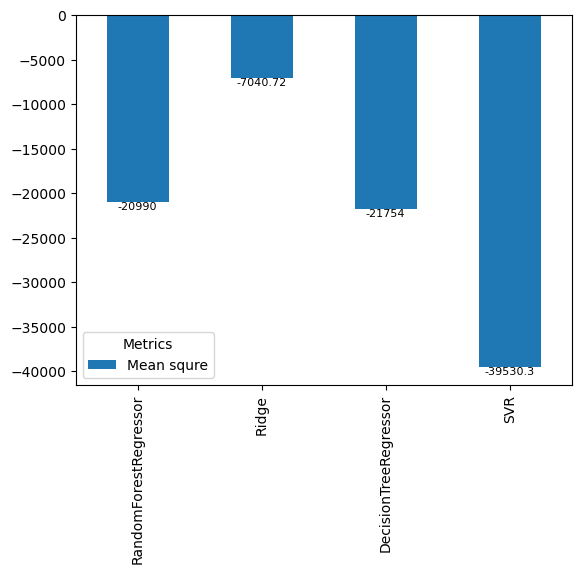

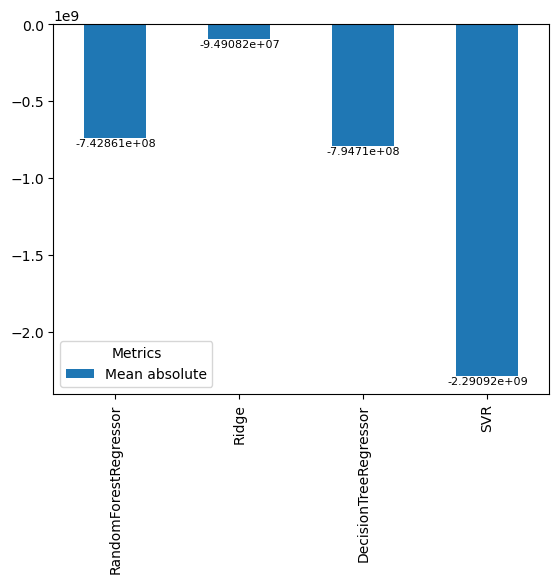

In [40]:
# Finding out other metrics with cross validation
import warnings
r2_dict = {}
mse_dict = {}
mae_dict = {}
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
scoring_metrics_reg  = ["r2", "neg_mean_absolute_error", "neg_mean_squared_error"]
def fit_and_Scores(X_train_split, y_train_split, X_val_split, y_val_split):
    model_scores_list = []
    ############# here the model is trained on test csv file and tested on test csv file
    # X, y = make_regression(n_samples=100, n_features=5, noise=0.1, random_state=42)
    for key,model in model_dict_reg.items():
        fitted_model = model
        y_preds = model.predict(X_val_split)
        for metric in scoring_metrics_reg:
            with warnings.catch_warnings():
                warnings.simplefilter("ignore", category=UserWarning)
                score = cross_val_score(fitted_model, X, y, cv=5, scoring=metric, verbose=0)
            resulted_score = np.mean(score)
            print(f'{key}:{metric} = {resulted_score}')
            if metric == "r2":
                r2_dict[key] = resulted_score
            elif metric == "neg_mean_absolute_error":
                mse_dict[key] = resulted_score
            else:
                mae_dict[key] = resulted_score
    return "GG"
np.random.seed(42)
function_call = fit_and_Scores(
                              X_train_split = X_train,
                              y_train_split = y_train,
                              X_val_split = X_test,
                              y_val_split = y_test)
################ PLotting
# for lim in range(len(model_dict_reg)):
#     print(function_call.__next__())
# plotting our results
# use the below commented code in case if there is error in plotting graphs
model_compare_r2 = pd.DataFrame(r2_dict,index = ["r2 score"])
model_compare_mse = pd.DataFrame(mse_dict,index = ["Mean squre"])       
model_compare_mae = pd.DataFrame(mae_dict,index = ["Mean absolute"])
# print("This Result is on a single test set without using corss validation")
##### Use the below code to print al the metrics ourside of the function
# print(f'{model_compare_acc}\n {model_compare_pre}\n {model_compare_rec}')

r2_plot = model_compare_r2.T.plot.bar()
for container in r2_plot.containers:
    r2_plot.bar_label(container, label_type='edge', fontsize=8, color='black')
r2_plot.legend(title='Metrics') 

mse_plot = model_compare_mse.T.plot.bar()
for container in mse_plot.containers:
    mse_plot.bar_label(container, label_type='edge', fontsize=8, color='black')
mse_plot.legend(title='Metrics') 
 
mae_plot = model_compare_mae.T.plot.bar()
for container in mae_plot.containers:
    mae_plot.bar_label(container, label_type='edge', fontsize=8, color='black')
mae_plot.legend(title='Metrics')

## We can clearly see that Ridge algorithm has a better metric scores

# Now we can predict the profit value of a item if we are given with R&D Spend, Administration Cost and Marketing Spend.

In [39]:
for key,model in model_dict_reg.items():
    fitted_model = model
    y_preds = model.predict(X_test)
y_preds
# just use model.predict on a given row in csv format to predict the profit value of a company

array([109540.2361735 , 109530.6238391 , 109527.92648535, 109528.97007725,
       109542.65351277, 109530.28024024, 109530.05112187, 109529.68957648,
       109528.15211132, 109530.21077249])

In [45]:
from operator import itemgetter
max_key_r2, max_value_r2 = max(r2_dict.items(), key=itemgetter(1))
max_key_mse, max_value_mse = max(mse_dict.items(), key=itemgetter(1))
max_key_mae, max_value_mae = max(mae_dict.items(), key=itemgetter(1))
print(f"The Best Regression model is '{max_key_r2}'Regressor with the following metrics:\n r2 score of {max_value_r2}\n neg mean squared error of {max_value_mse}\n neg mean absolute error of {max_value_mae}")
# print('The best Regression model is Ridge Regressor with the following metrics')
# for metric in scoring_metrics_reg:
#     print(f'{metric}: '

The Best Regression model is 'Ridge'Regressor with the following metrics:
 r2 score of -0.12161992884554138
 neg mean squared error of -7040.723062061297
 neg mean absolute error of -94908167.61826864


## HyperParameter Tuning
Using Random Search Cross Vaildation(RSCV) on the best model we found

In [56]:
## Hyperparameter tuning using RSCV
# Creating a HP grid for SVC
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
max_list = [10,5,80,1000]
grid = {
            "alpha":[5,5,10],
            "max_iter":max_list}
rs = RandomizedSearchCV(Ridge(),
                           param_distributions=SVC_grid,
                          cv=5,
                          n_iter=20,
                          verbose=True)
rs.fit(X_train,y_train)
rs.best_params_


C:\Users\Neeraj Mathur\desktop\MLDL projects\env\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 12 candidates, totalling 60 fits


{'max_iter': 10, 'alpha': 5}

Best parameters are 10 and 5

In [58]:
HP_tuned_model = Ridge(max_iter=10,
                       alpha = 5)
fitted_model = HP_tuned_model.fit(X_train,y_train)
score = fitted_model.score(X_test,y_test)
score

0.9000609453011303

## Therefore the best model is Ridge Regressor for the given problem

In [60]:
#Version of the libraries used:
import pandas as pd
print("Pandas version:", pd.__version__)
import numpy as np
print("NumPy version:", np.__version__)
import sklearn
print("Scikit-learn version:", sklearn.__version__)
import sys
print("Python version:", sys.version)


Pandas version: 1.5.3
NumPy version: 1.24.3
Scikit-learn version: 1.3.0
Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]
